# The Museum of Modern Art: A closer look at how collections have progressed in the past 150 years
Maleeha Zaman 7/30/2023

Project for Digital Humanities 140: Coding For Humanities (UCLA Summer 2023)

## Introduction

![MoMA Pic](images/moma.jpg)

> The Museum of Modern Art (MoMA) was established in New York City and hosts a collection of modern (produced during 1860s-1970s) and contemporary (produced by artists today) art works. Acquiring its first works in 1929, MoMA now has an evolving collection containing over 200,000 works from around the world. The collections includes an expansive range of visual expression such as painting, sculpture, printmaking, film, and many more that will be investigated in this project.  

### About the Dataset

[Museum of Modern Art Collection](https://github.com/MuseumofModernArt/collection)

This MoMA collections data was developed by the Museum itself and sourced directly form the MoMA database. It consists of an artists dataset and acquired artworks dataset.

The [artworks dataset](https://github.com/MuseumofModernArt/collection/blob/master/Artworks.csv) contains basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum. Some of the records have incomplete information and have been noted as "not Curator Approved".

The [artists dataset](https://github.com/MuseumofModernArt/collection/blob/master/Artists.csv) contains 15,243 records of artists who have works in MoMA's collection. It includes basic metadata for each artist, including name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID.

### Why Examine the History of MoMA Collections?
The MoMA collections dataset holds immense potential to uncover trends and influences on the artistic evolution during the past 150 years. Examining the metadata of the artists and art works included in the collection, we can more accurately trace the cultural, social, and historical shifts that occurred in MoMA, as well as any disparities in representation. This dataset can offer key insights into the tastes of MoMA curators by examining factors that could have contributed to their inclusion in the MoMA collections as well as identify underrepresented groups.  

### Research Questions
1. How do the titles and descriptions of artworks in the collection reflect shifts in language use and cultural norms throughout the 20th and 21st centuries? 
2. How does the representation of underrepresented artists, such as women, artists of color, and LGBTQ+ artists change over time in the collections?
3. What aspects of the artists and their works influence the museum's curatorial decisions and artistic preferences? Can we categorize eras of the museum's curatorial choices based on stylistic preferences during a specific time period, if there is any? 

## Methods

## Results

### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import string

import requests
import nltk

from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer 

In [2]:
dfartworks = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artworks.csv')
dfartists = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artists.csv')

In [3]:
dfartworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NCJd...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NSJd...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [4]:
dfartists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [5]:
dfartists['Nationality'].unique()

array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', nan, 'Israeli', 'British', 'Finnish',
       'Polish', 'Palestinian', 'Japanese', 'Guatemalan', 'Colombian',
       'Romanian', 'Russian', 'German', 'Argentine', 'Kuwaiti', 'Belgian',
       'Dutch', 'Norwegian', 'Nationality unknown', 'Chilean', 'Swiss',
       'Costa Rican', 'Czech', 'Brazilian', 'Austrian', 'Canadian',
       'Australian', 'Ukrainian', 'Hungarian', 'Haitian', 'Congolese',
       'Bolivian', 'Cuban', 'Slovenian', 'Portuguese', 'Indian',
       'Peruvian', 'Icelandic', 'Irish', 'Croatian', 'Uruguayan',
       'Slovak', 'Greek', 'Chinese', 'Venezuelan', 'Native American',
       'Turkish', 'Panamanian', 'Algerian', 'Ecuadorian', 'South African',
       'Iranian', 'Korean', 'Serbian', 'Canadian Inuit', 'Paraguayan',
       'Luxembourger', 'Nicaraguan', 'Zimbabwean', 'Moroccan',
       'Tanzanian', 'Bulgarian', 'Tunisian', 'Sudanese', 'Taiwanese',
       'Ethiopian', 'Yu

In [6]:
dfartists['Gender'].unique()

array(['Male', 'Female', nan, 'Non-Binary', 'male', 'female',
       'Non-binary'], dtype=object)

In [7]:
dfartists['Gender'] = dfartists['Gender'].str.lower()

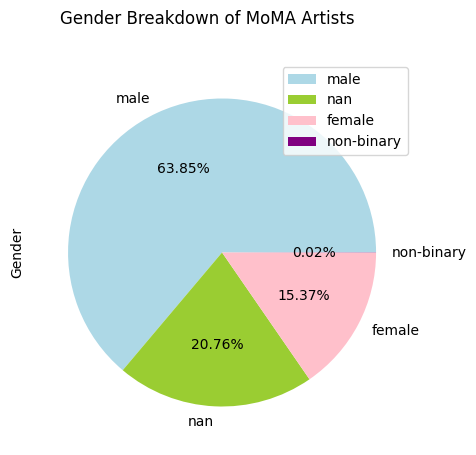

In [49]:
gender = dfartists['Gender']
dfgender = gender.value_counts(dropna = False).to_frame()
genderplot = dfgender.plot.pie(subplots = True, figsize=(12,5), autopct='%1.2f%%', colors = ['lightblue', 'yellowgreen', 'pink', 'purple'], title = 'Gender Breakdown of MoMA Artists')

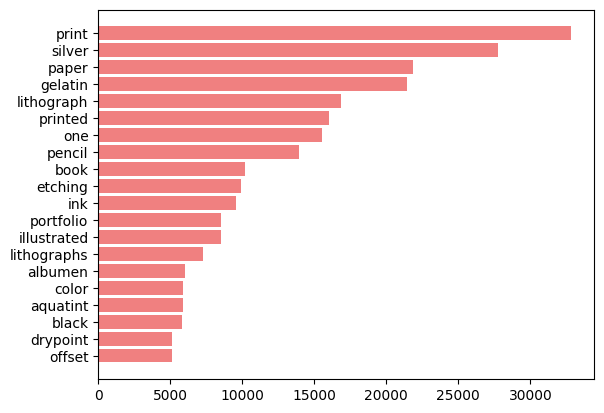

In [9]:
myStopWords = list(punctuation) + stopwords.words('english')
dfartworks['Medium'] = dfartworks['Medium'].str.lower()
dfartworks['Medium'] = dfartworks['Medium'].str.replace(',', ' ')
dfartworks = dfartworks.astype({'Medium':'string'})
dfmed = dfartworks['Medium'].dropna()
medwordlist = []
for i in dfmed:
    for w in i.split():
        if w not in myStopWords:
            medwordlist.append(w)
# NEED TO REDUCE WORDS TO STEMS TO FURTHER REFINE
dfmed = pd.DataFrame(nltk.FreqDist(medwordlist).most_common(20), columns= ['Words', 'Frequency']).sort_values('Frequency')
medplot = plt.barh(dfmed['Words'], dfmed['Frequency'], color='lightcoral')

<Axes: >

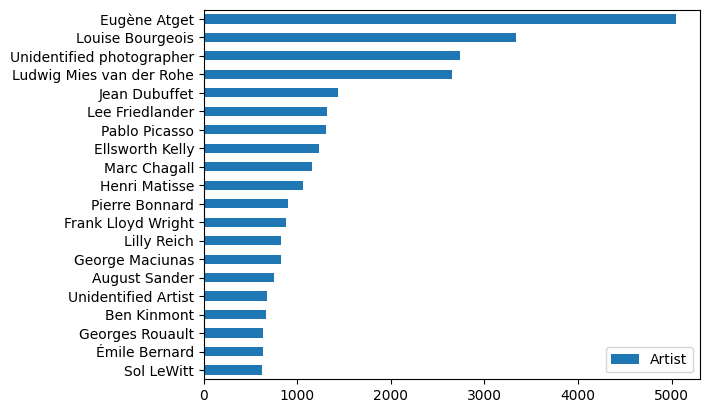

In [10]:
artistdist = dfartworks['Artist']
artistdistdf = artistdist.value_counts().to_frame()
artistdistdf.head(20).sort_values('Artist').plot.barh()

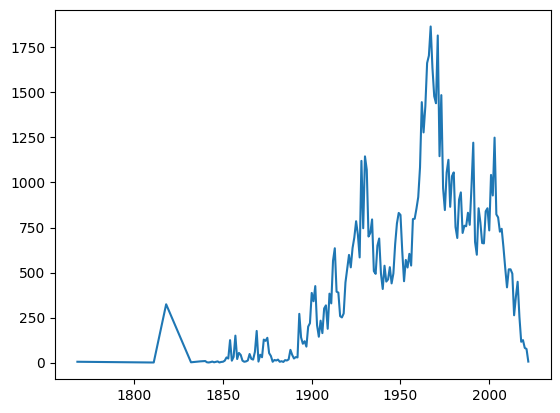

In [46]:
dates = []
for i in dfartworks['Date']:
  if (not pd.isna(i)) and i.isnumeric() and len(i) == 4:
    dates.append(int(i))
dates.sort()
timeseries = np.unique(dates, return_counts=True)
plt.plot(timeseries[0], timeseries[1])

### Focused Analysis

DATA VIZ 1:
Plot to categorize mediums according to the words included for each artwork, and plot the frequencies of the artworks (divided into different lines according to each medium) over time

DATA VIZ 2:
Sentiment analysis on "Title" variable of artworks (using Vader). Plot negative and positive composite scores over time to identify if MoMA curators have fluctuated between positive and negative themes

DATA VIZ 3:
Categorize nationalities into more broader regions (by continent/continental regions) and plot histograms/or a line plot for each region to identify groups that have come to be more represented/underrepresented

DATA VIZ 4: Plot frequencies of female/male artists over time (non-binary artists are excluded as there is less than 1% of them represented in this dataset)

DATA VIZ 5: Plot frequencies of mediums against artists' continental regions (possibly arranging this into a map somehow using folium?)

## Discussion